<a href="https://colab.research.google.com/github/mmartigani/MachineLearning2/blob/main/ML28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from scipy.cluster.hierarchy import dendrogram , linkage

In [2]:
data=pd.read_csv('/content/customer_data.csv')
data

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,Libros
1,2,69,91,86,Hogar
2,3,46,46,23,Electrónica
3,4,32,28,66,Libros
4,5,60,81,27,Electrónica
...,...,...,...,...,...
195,196,69,77,99,Libros
196,197,30,86,36,Electrónica
197,198,58,65,82,Electrónica
198,199,20,43,96,Alimentos


In [3]:
escalador=MinMaxScaler()
dato_escalado=escalador.fit_transform(data[['Edad','Ingresos Anuales (k$)','Puntuación de Gasto (1-100)']])
dato_escalado

array([[0.74509804, 0.6969697 , 0.46938776],
       [1.        , 0.71717172, 0.86734694],
       [0.54901961, 0.26262626, 0.2244898 ],
       [0.2745098 , 0.08080808, 0.66326531],
       [0.82352941, 0.61616162, 0.26530612],
       [0.1372549 , 0.36363636, 0.01020408],
       [0.39215686, 0.96969697, 0.90816327],
       [0.74509804, 0.50505051, 0.16326531],
       [0.35294118, 0.43434343, 0.32653061],
       [0.43137255, 0.23232323, 0.08163265],
       [0.19607843, 0.78787879, 0.42857143],
       [0.19607843, 0.58585859, 0.47959184],
       [0.45098039, 0.31313131, 0.3877551 ],
       [0.68627451, 0.95959596, 0.93877551],
       [0.76470588, 0.87878788, 0.41836735],
       [0.45098039, 0.51515152, 0.25510204],
       [0.03921569, 0.61616162, 1.        ],
       [0.41176471, 0.57575758, 0.5       ],
       [0.01960784, 0.51515152, 0.24489796],
       [0.45098039, 0.11111111, 0.23469388],
       [0.84313725, 0.38383838, 0.12244898],
       [0.56862745, 0.01010101, 0.60204082],
       [0.

In [4]:
pca=PCA(n_components=2)
pca_resultado = pca.fit_transform(dato_escalado)

In [5]:
U, sigma, VT =np.linalg.svd(dato_escalado)

In [7]:
k = 2
svd_resultados= U[:, :k]* sigma[:k]

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
k_cluster = kmeans.fit_predict(dato_escalado)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
linked= linkage(dato_escalado, method='ward')

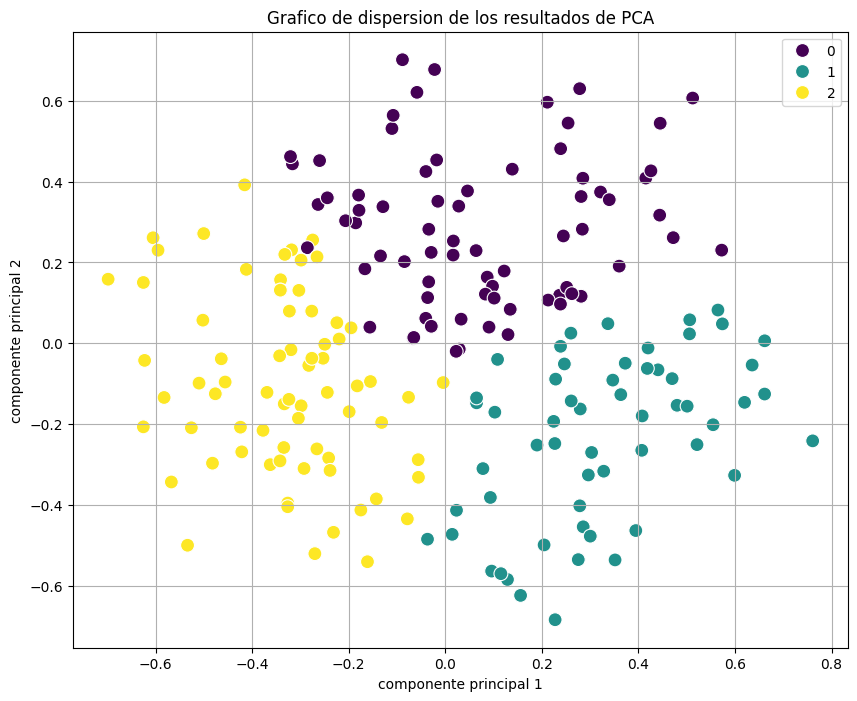

In [10]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_resultado[:,0], y=pca_resultado[:,1], hue=k_cluster, palette='viridis',s=100)
plt.title('Grafico de dispersion de los resultados de PCA')
plt.xlabel('componente principal 1')
plt.ylabel('componente principal 2')
plt.legend()
plt.grid(True)

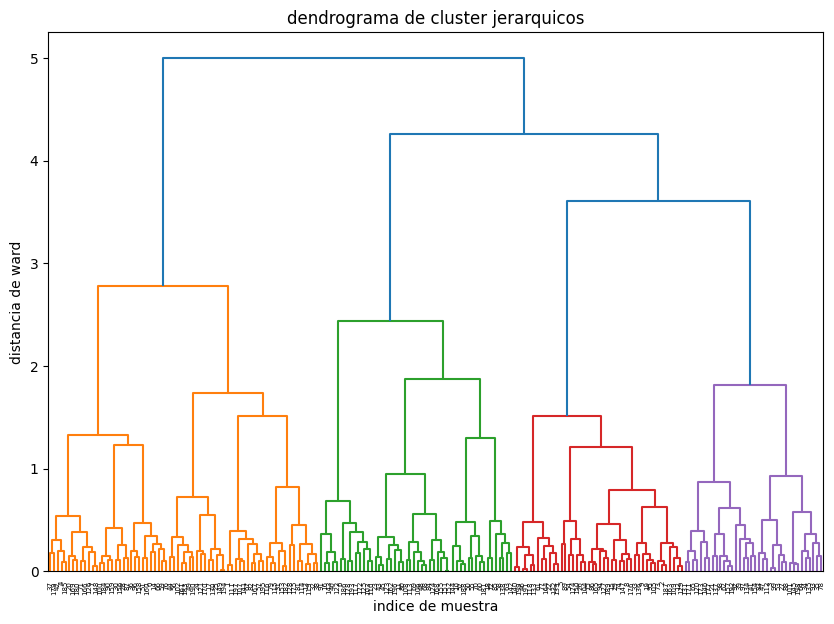

In [15]:
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title('dendrograma de cluster jerarquicos')
plt.xlabel('indice de muestra')
plt.ylabel('distancia de ward')
plt.axhline(y=10, color='r', linestyle = '--');

In [17]:
cluster_info= pd.DataFrame({'Cluster':k_cluster,
                            'Edad':data['Edad'],
                            'Ingresos':data['Ingresos Anuales (k$)'],
                            'Gasto':data['Puntuación de Gasto (1-100)']})
for cluster in cluster_info['Cluster'].unique():
  cluster_data = cluster_info[cluster_info['Cluster']== cluster]
  print(f'Cluster: {cluster}: ')
  print(f"-Edad media: {cluster_data['Edad'].mean():.0f}")
  print(f"-Ingresos Medios:{cluster_data['Ingresos'].mean():.2f}")
  print(f"-Puntuacion de gastos media: {cluster_data['Gasto'].mean():.2f}")
  print()

Cluster: 1: 
-Edad media: 58
-Ingresos Medios:95.47
-Puntuacion de gastos media: 58.86

Cluster: 2: 
-Edad media: 42
-Ingresos Medios:49.79
-Puntuacion de gastos media: 21.63

Cluster: 0: 
-Edad media: 33
-Ingresos Medios:68.60
-Puntuacion de gastos media: 70.71

